In [31]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

In [32]:
car_stats_df = pd.read_csv('../data/car_data.csv')
car_stats_df[car_stats_df['cylinders'] == 3]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
71,19.0,3,70.0,97.00,2330.0,13.5,72,3,mazda rx2 coupe
111,18.0,3,70.0,90.00,2124.0,13.5,73,3,maxda rx3
243,21.5,3,80.0,110.0,2720.0,13.5,77,3,mazda rx-4
334,23.7,3,70.0,100.0,2420.0,12.5,80,3,mazda rx-7 gs


Hypothesis Test for Cylinders vs. MPG:  
Null Hypothesis (H0): There is no correlation between a car's numbers of cylinders and its MPG.  
Alternate Hypothesis (H1): There is a significant correlation between a car's number of cylinders and its MPG.

In [33]:
cylinders_mpg = car_stats_df.loc[:, ['cylinders', 'mpg']]

cylinders_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cylinders  398 non-null    int64  
 1   mpg        398 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.3 KB


In [34]:
cylinder_groups = cylinders_mpg.groupby('cylinders')
cylinder_groups.head()

,cylinders,mpg
0,8,18.0
1,8,15.0
2,8,18.0
3,8,16.0
4,8,17.0
14,4,24.0
15,6,22.0
16,6,18.0
17,6,21.0
18,4,27.0


In [35]:
cylinder_groups.mean()

,mpg
cylinders,
3,20.550000
4,29.286765
5,27.366667
6,19.985714
8,14.963107


In [36]:
cylinder_groups.std()

,mpg
cylinders,
3,2.564501
4,5.710156
5,8.228204
6,3.807322
8,2.836284


In [37]:
bonn_corr = 0.05/10
bonn_corr

0.005

In [38]:
def test_mpg(df, grouping_var, value, alpha=bonn_corr):
    results = pd.DataFrame()
    combos = combinations(pd.unique(df[grouping_var]), 2)
    for grp1, grp2 in combos:
        grp1_values = df[df[grouping_var] == grp1][value]
        grp2_values = df[df[grouping_var] == grp2][value]
        
        ttest_p_value = st.ttest_ind(grp1_values, grp2_values, alternative='two-sided')[1]
        
        grp1_mean = grp1_values.mean()
        grp2_mean = grp2_values.mean()
        
        diff = grp1_mean-grp2_mean
        is_significant = ttest_p_value < alpha
        
        
        results = results.append({
                'first_group':grp1, 'second_group':grp2, 
                'first_group_mean':grp1_mean, 'second_group_mean':grp2_mean,
                'mean_diff':diff, 'ttest_p_value':ttest_p_value,
                'is_significant': is_significant},
                ignore_index=True)

   #order logically
    results = results[['first_group', 'second_group', 
                    'first_group_mean', 'second_group_mean', 
                    'mean_diff', 'ttest_p_value', 'is_significant']
                     ].sort_values('ttest_p_value')

    return results     #.dropna().reset_index().drop('index', axis=1)

In [39]:
test_mpg(car_stats_df, 'cylinders', 'acceleration')

C:\Users\benha\AppData\Local\Temp\ipykernel_38252\2812667132.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\benha\AppData\Local\Temp\ipykernel_38252\2812667132.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\benha\AppData\Local\Temp\ipykernel_38252\2812667132.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\benha\AppData\Local\Temp\ipykernel_38252\2812667132.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\benha\AppData\Local\Temp\ipykernel_38252\2812667132.py:17: FutureWarnin

,first_group,second_group,first_group_mean,second_group_mean,mean_diff,ttest_p_value,is_significant
0,8,4,12.955340,16.601471,-3.646131,7.798166e-31,True
1,8,6,12.955340,16.263095,-3.307755,1.257666e-20,True
3,8,5,12.955340,18.633333,-5.677994,3.163988e-05,True
7,6,3,16.263095,13.250000,3.013095,3.951846e-03,True
5,4,3,16.601471,13.250000,3.351471,5.494301e-03,False
9,3,5,13.250000,18.633333,-5.383333,6.089213e-03,False
8,6,5,16.263095,18.633333,-2.370238,5.012485e-02,False
6,4,5,16.601471,18.633333,-2.031863,1.440024e-01,False
4,4,6,16.601471,16.263095,0.338375,2.539446e-01,False
2,8,3,12.955340,13.250000,-0.294660,7.926878e-01,False


## Official Hypothesis Test

H0: 6cyl, 8cyl >= 4cyl in mpg, acceleration

Ha: 6cyl, 8cyl < 4cyl in mpg, acceleration

In [40]:
hyp_test_df = car_stats_df.reset_index().drop(['displacement', 'weight', 'origin', 'model', 'car_name', 'horsepower', 'index'], axis=1).loc[:, ['cylinders', 'acceleration', 'mpg']]
hyp_test_df.sample(5)

,cylinders,acceleration,mpg
113,6,14.0,21.0
124,8,11.0,11.0
54,4,18.0,35.0
276,4,15.7,21.6
129,4,19.0,31.0


In [41]:
hyp_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   acceleration  398 non-null    float64
 2   mpg           398 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [42]:
# hyp_test_df.groupby('cylinders').mean()
# hyp_test_df.groupby('cylinders').std()
hyp_test_df.groupby('cylinders').count()

,acceleration,mpg
cylinders,,
3,4,4
4,204,204
5,3,3
6,84,84
8,103,103


### MPG Comparisons

In [43]:
# declarations for 4 cylinder mpg
fourcyl_mpg_std = hyp_test_df.groupby('cylinders').std().iloc[1, 1]

fourcyl_mpg_mean = hyp_test_df.groupby('cylinders').mean().iloc[1, 1]

fourcyl_mpg_sem = fourcyl_mpg_std/np.sqrt(204)

fourcyl_mpg_dist = st.norm(fourcyl_mpg_mean, fourcyl_mpg_sem)

four_times_sem_fourcylmpg = fourcyl_mpg_sem * 4

fourcyl_linspace = np.linspace(fourcyl_mpg_mean-four_times_sem_fourcylmpg, fourcyl_mpg_mean+four_times_sem_fourcylmpg,204)

In [44]:
# declarations for 6 cylinder mpg
sixcyl_mpg_std = hyp_test_df.groupby('cylinders').std().iloc[3, 1]

sixcyl_mpg_mean = hyp_test_df.groupby('cylinders').mean().iloc[3, 1]

sixcyl_mpg_sem = sixcyl_mpg_std/np.sqrt(84)

sixcyl_mpg_dist = st.norm(sixcyl_mpg_mean, sixcyl_mpg_sem)

four_times_sem_sixcylmpg = sixcyl_mpg_sem * 4

sixcyl_linspace = np.linspace(sixcyl_mpg_mean-four_times_sem_sixcylmpg, sixcyl_mpg_mean+four_times_sem_sixcylmpg,84)

In [45]:
# declarations for 8 cylinder mpg
eightcyl_mpg_std = hyp_test_df.groupby('cylinders').std().iloc[4, 1]

eightcyl_mpg_mean = hyp_test_df.groupby('cylinders').mean().iloc[4, 1]

eightcyl_mpg_sem = eightcyl_mpg_std/np.sqrt(103)

eightcyl_mpg_dist = st.norm(eightcyl_mpg_mean, eightcyl_mpg_sem)

four_times_sem_eightcylmpg = eightcyl_mpg_sem * 4

eightcyl_linspace = np.linspace(eightcyl_mpg_mean-four_times_sem_eightcylmpg, eightcyl_mpg_mean+four_times_sem_eightcylmpg,103)

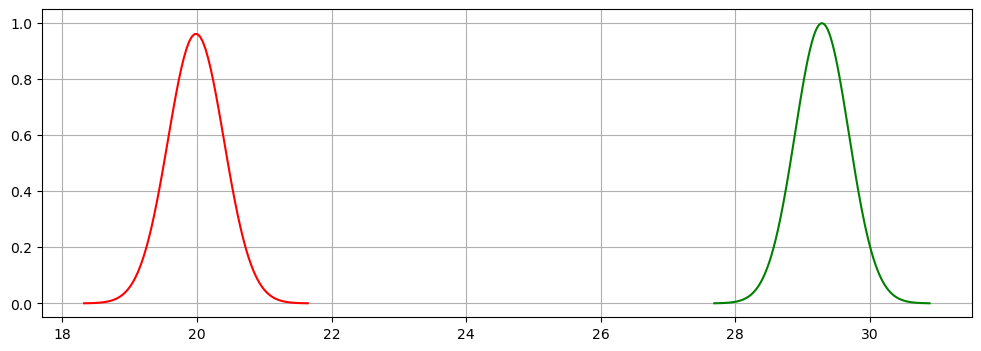

In [46]:
# plot distributions for mpg
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(fourcyl_linspace, fourcyl_mpg_dist.pdf(fourcyl_linspace), color = 'green')
ax.plot(sixcyl_linspace, sixcyl_mpg_dist.pdf(sixcyl_linspace), color = 'red')
# ax.plot(eightcyl_linspace, eightcyl_mpg_dist.pdf(eightcyl_linspace), color = 'blue')

# ax.axvline(x = fourcyl_mpg_dist.ppf(0.025), color = 'grey',ls="--")
# ax.axvline(x = fourcyl_mpg_dist.ppf(1-0.025), color = 'grey',ls="--")
plt.grid()

### Acceleration Comparisons

In [47]:
# declarations for 4 cylinder acceleration
fourcyl_accel_std = hyp_test_df.groupby('cylinders').std().iloc[1, 0]

fourcyl_accel_mean = hyp_test_df.groupby('cylinders').mean().iloc[1, 0]

fourcyl_accel_sem = fourcyl_accel_std/np.sqrt(204)

fourcyl_accel_dist = st.norm(fourcyl_accel_mean, fourcyl_accel_sem)

four_times_sem_fourcylaccel = fourcyl_accel_sem * 4

fourcyl_linspace_accel = np.linspace(fourcyl_accel_mean-four_times_sem_fourcylaccel, fourcyl_accel_mean+four_times_sem_fourcylaccel,204)

In [48]:
# declarations for 6 cylinder acceleration
sixcyl_accel_std = hyp_test_df.groupby('cylinders').std().iloc[3, 0]

sixcyl_accel_mean = hyp_test_df.groupby('cylinders').mean().iloc[3, 0]

sixcyl_accel_sem = sixcyl_accel_std/np.sqrt(84)

sixcyl_accel_dist = st.norm(sixcyl_accel_mean, sixcyl_accel_sem)

four_times_sem_sixcylaccel = sixcyl_accel_sem * 4

sixcyl_linspace_accel = np.linspace(sixcyl_accel_mean-four_times_sem_sixcylaccel, sixcyl_accel_mean+four_times_sem_sixcylaccel,84)

In [49]:
# declarations for 8 cylinder acceleration
eightcyl_accel_std = hyp_test_df.groupby('cylinders').std().iloc[4, 0]

eightcyl_accel_mean = hyp_test_df.groupby('cylinders').mean().iloc[4, 0]

eightcyl_accel_sem = eightcyl_accel_std/np.sqrt(103)

eightcyl_accel_dist = st.norm(eightcyl_accel_mean, eightcyl_accel_sem)

four_times_sem_eightcylaccel = eightcyl_accel_sem * 4

eightcyl_linspace_accel = np.linspace(eightcyl_accel_mean-four_times_sem_eightcylaccel, eightcyl_accel_mean+four_times_sem_eightcylaccel,103)

In [50]:
sixcyl_accel_std

2.0211400672747346

In [53]:
def compute_power(n, sigma, alpha, mu0, mua):
    standard_error = sigma / n**0.5
    h0 = st.norm(mu0, standard_error)
    ha = st.norm(mua, standard_error)
    critical_value = h0.ppf(1 - alpha)
    power = 1 - ha.cdf(critical_value)
    return power

In [89]:
sixcyl_accel_std

2.0211400672747346

In [87]:
sig = np.sqrt(sixcyl_accel_mean*(1-sixcyl_accel_mean))
sig

C:\Users\benha\AppData\Local\Temp\ipykernel_38252\3732494414.py:1: RuntimeWarning: invalid value encountered in sqrt
  sig = np.sqrt(sixcyl_accel_mean*(1-sixcyl_accel_mean))


nan

In [73]:
compute_power(84,2.02,0.05,fourcyl_accel_mean,sixcyl_accel_mean)

0.0007360411612690188

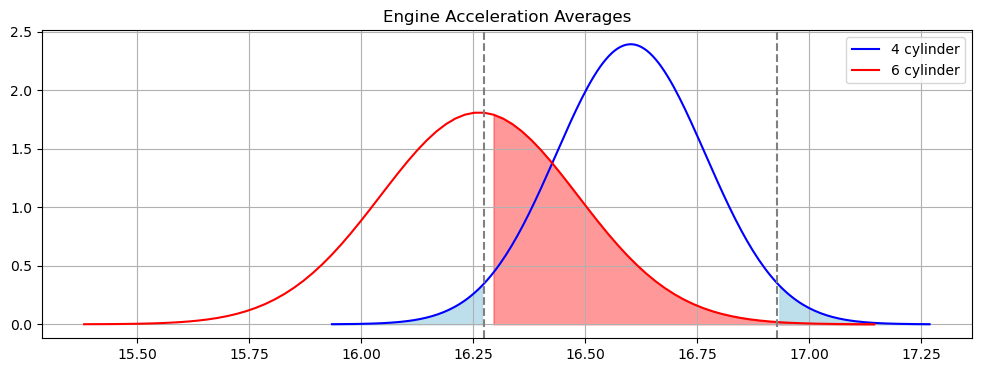

In [118]:
# plot distributions for acceleration
fig, ax = plt.subplots(figsize=(12, 4))
labels = ["4 cylinder","6 cylinder"]
ax.plot(fourcyl_linspace_accel, fourcyl_accel_dist.pdf(fourcyl_linspace_accel), color = 'blue')
ax.plot(sixcyl_linspace_accel, sixcyl_accel_dist.pdf(sixcyl_linspace_accel), color = 'red')
ax.legend(labels)
# ax.plot(eightcyl_linspace_accel, eightcyl_accel_dist.pdf(eightcyl_linspace_accel), color = 'blue')

ax.axvline(x = fourcyl_accel_dist.ppf(0.025), color = 'grey',ls="--")
ax.axvline(x = fourcyl_accel_dist.ppf(1-.025), color = 'grey',ls="--")

y_vals = fourcyl_accel_dist.pdf(fourcyl_linspace_accel)
ax.fill_between(fourcyl_linspace_accel,y_vals,0,where=(fourcyl_linspace_accel<=fourcyl_accel_dist.ppf(.025)),alpha=.8,color='lightblue')
ax.fill_between(fourcyl_linspace_accel,y_vals,0,where=(fourcyl_linspace_accel>=fourcyl_accel_dist.ppf(1-.025)),alpha=.8,color='lightblue')
x_vals = sixcyl_linspace_accel
y2_vals = sixcyl_accel_dist.pdf(sixcyl_linspace_accel)
ax.fill_between(x_vals,y2_vals,0,where=(x_vals>=fourcyl_accel_dist.ppf(0.025)),color='red',alpha=.4)

ax.set_title("Engine Acceleration Averages")
plt.grid()

In [109]:
accel_df = hyp_test_df.drop('mpg',axis=1)
accel_df[accel_df['cylinders'] == 4]
fourcyl_df = accel_df[accel_df['cylinders'] == 4]
fourcyl_array = fourcyl_df['acceleration'].values


accel_df[accel_df['cylinders'] == 6]
sixcyl_df = accel_df[accel_df['cylinders'] == 6]
sixcyl_array = sixcyl_df['acceleration'].values
sixcyl_array

array([15.5, 15.5, 16. , 15. , 13. , 15.5, 15.5, 15.5, 15.5, 13.5, 15. ,
       14.5, 16.5, 18. , 16. , 16.5, 16. , 15. , 14. , 13.5, 16.5, 17. ,
       16. , 17. , 17. , 18. , 16.5, 16. , 16. , 21. , 19.5, 21. , 18.5,
       19. , 19. , 15. , 16. , 14.5, 17. , 15.4, 14.5, 17.6, 17.6, 17.7,
       21. , 16.2, 17.8, 15.5, 16.7, 16.4, 16.9, 17.7, 19. , 14.5, 19.2,
       18.2, 15.8, 17.2, 17.2, 15.8, 16.7, 18.7, 15.1, 13.4, 13.6, 15.8,
       15.4, 18.2, 18.2, 16.6, 11.3, 12.9, 18.7, 11.4, 12.6, 19.6, 12.6,
       13.8, 15.8, 17.1, 16.6, 16.4, 17. , 14.7])

In [120]:
st.ttest_ind(sixcyl_array,fourcyl_array,alternative="greater")

Ttest_indResult(statistic=-1.143120220859928, pvalue=0.8730276753744901)

H0: 4 cylinder engine acceleration averages are significantly greater than or equal to 6 cylinder

H1: 4 cylinder engine acceleration averages are significantly less than 6 cylinder